<a href="https://colab.research.google.com/github/ristaangdembay/Bootcamp-DA-AI/blob/main/Time_series_AMZN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [ ]:
df = yf.download('AMZN', start= '2010-01-01', end = '2020-12-28')
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [ ]:
df_3m = df.resample('3m').mean()
df_3m = df_3m[['Close']]
df_3m.head()

,Close
Date,
2010-01-31,6.371158
2010-04-30,6.520246
2010-07-31,6.108492
2010-10-31,7.231813
2011-01-31,8.825762


In [ ]:
df_3m['3M_return'] = np.log(df_3m['Close']).diff()
df_3m.head()

,Close,3M_return
Date,,
2010-01-31,6.371158,NaN
2010-04-30,6.520246,0.023131
2010-07-31,6.108492,-0.065232
2010-10-31,7.231813,0.168810
2011-01-31,8.825762,0.199185


In [ ]:
df_3m.dropna(inplace = True)

In [ ]:
df_3m.head()

,Close,3M_return
Date,,
2010-04-30,6.520246,0.023131
2010-07-31,6.108492,-0.065232
2010-10-31,7.231813,0.168810
2011-01-31,8.825762,0.199185
2011-04-30,8.883274,0.006495


In [ ]:
df_3m = df_3m.drop(['Close'], axis = 1)


In [ ]:
df_3m.head()

,3M_return
Date,
2010-04-30,0.023131
2010-07-31,-0.065232
2010-10-31,0.168810
2011-01-31,0.199185
2011-04-30,0.006495


<Axes: xlabel='Date'>

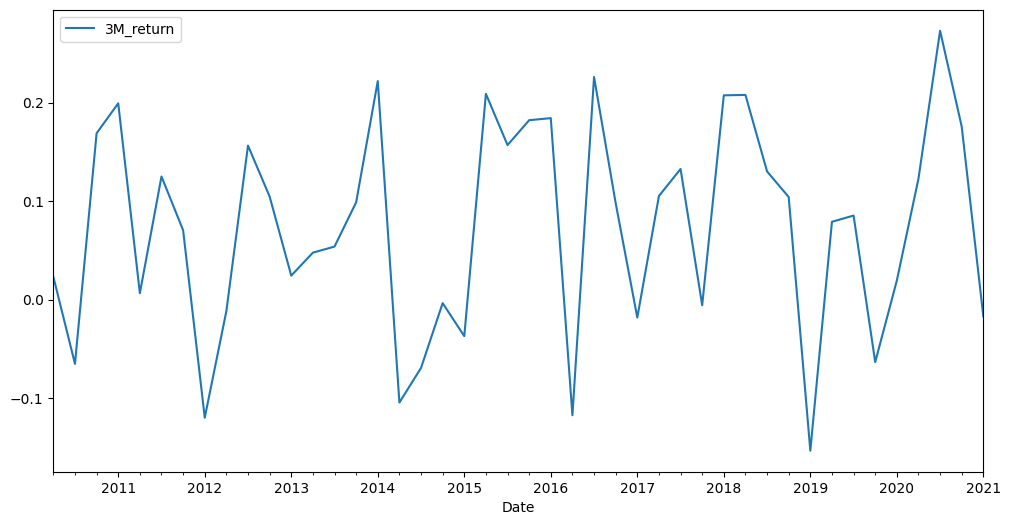

In [ ]:
df_3m.plot(kind = 'line', figsize = (12,6))

In [ ]:
#Test for Stationarity

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
mean20 = df_3m.rolling(20).mean()
std20 = df_3m.rolling(20).std()

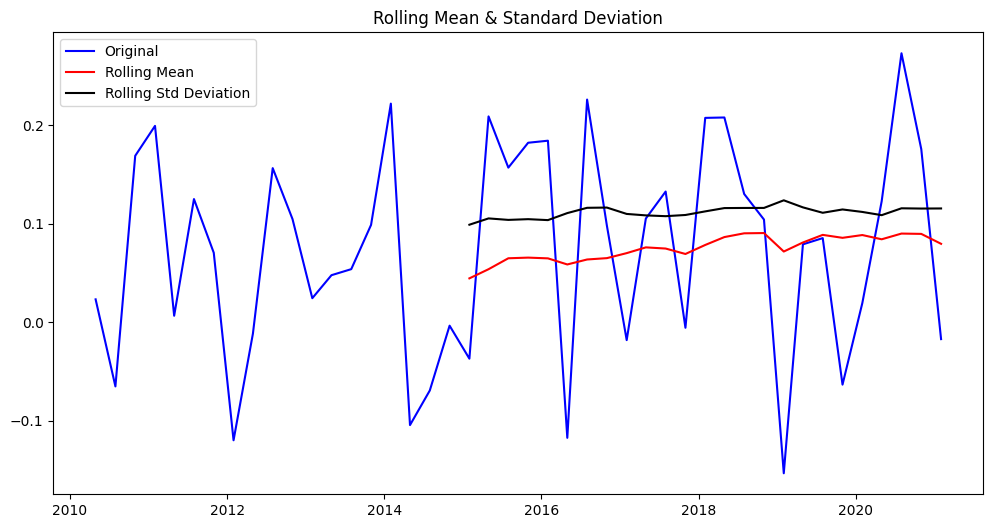

In [ ]:
plt.figure(figsize =(12,6))
orig = plt.plot(df_3m, color = 'blue', label = 'Original')
mean = plt.plot(mean20, color = 'red', label = 'Rolling Mean')
std = plt.plot(std20, color = 'black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend( loc = 'best')
plt.show(block = False)

In [ ]:
#Dickey-Fuller Test

dftest = sm.tsa.adfuller(df_3m, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used',
                                           'Number of Observation'])
for key, value in dftest[4].items():
  dfoutput['Critical Value({0})'.format(key)] = value

dfoutput

Test Statistics         -6.067761e+00
p-value                  1.170596e-07
#Lags Used               0.000000e+00
Number of Observation    4.300000e+01
Critical Value(1%)      -3.592504e+00
Critical Value(5%)      -2.931550e+00
Critical Value(10%)     -2.604066e+00
dtype: float64

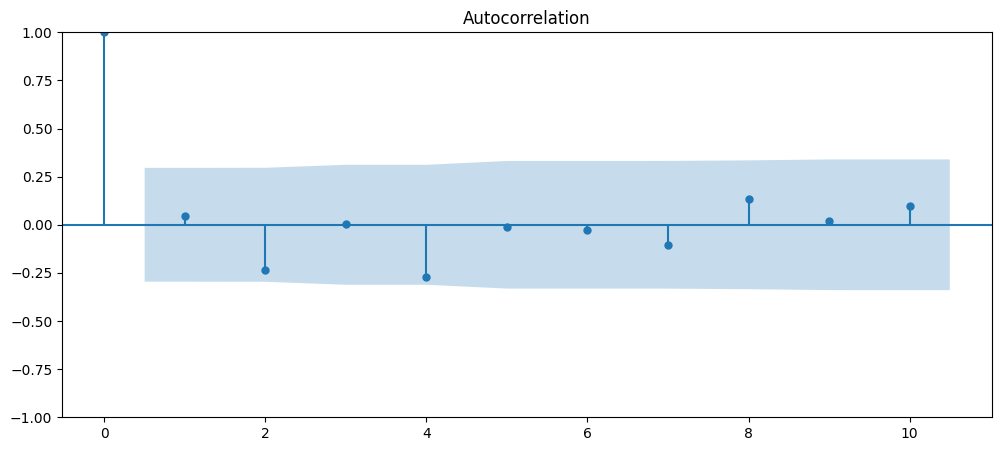

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig,ax = plt.subplots(figsize = (12,5))
plot_acf(df_3m.values, lags = 10, ax = ax)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


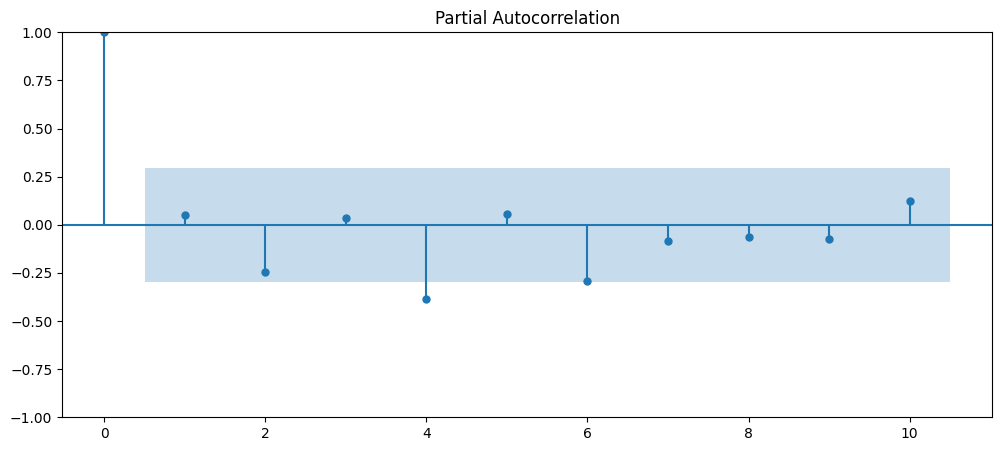

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize = (12,5))
plot_pacf(df_3m.values, lags = 10, ax = ax)
plt.show()

In [ ]:
#Build ARMA model

from statsmodels.tsa.arima.model import ARIMA

ar1 = ARIMA(df_3m.values, order = (1,0,1)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  37.790
Date:                Mon, 03 Apr 2023   AIC                            -67.580
Time:                        12:50:45   BIC                            -60.444
Sample:                             0   HQIC                           -64.934
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0728      0.019      3.879      0.000       0.036       0.110
ar.L1         -0.5930      0.295     -2.011      0.044      -1.171      -0.015
ma.L1          0.8410      0.187      4.499      0.000       0.475       1.207
sigma2         0.0104      0.003      3.662      0.000       0.005       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.53   Prob(JB):                         0.71
Heteroskedasticity (H):               1.84   Skew:                            -0.11
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

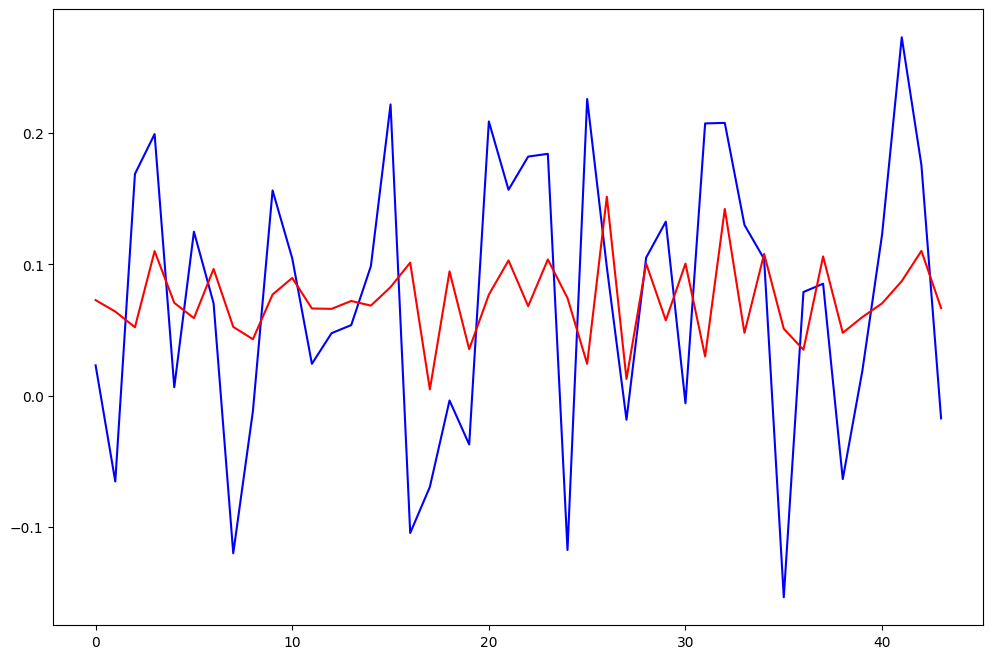

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(df_3m.values, color = 'blue')
preds = ar1.fittedvalues
plt.plot(preds, color = 'red')
plt.show()